<a href="https://colab.research.google.com/github/anushkakakkar/LGMVIP-DataScience-Internship/blob/main/Neural_Network_that_can_read_handwriting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LetsGrowMore

## Name : Anushka Kakkar

# Task4: Develop A Neural Network That Can Read Handwriting :

# Level : Advanced level task

Begin my neural network machine learning project with the MNIST Handwritten Digit Classification Challenge and using Tensorflow and CNN. It has a very user-friendly interface that’s ideal for beginners.

Dataset link : https://en.wikipedia.org/wiki/MNIST_database


# Importing Libraries


In [1]:
#Importing packages
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

# Loading dataset

In [2]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


# Displaying some images

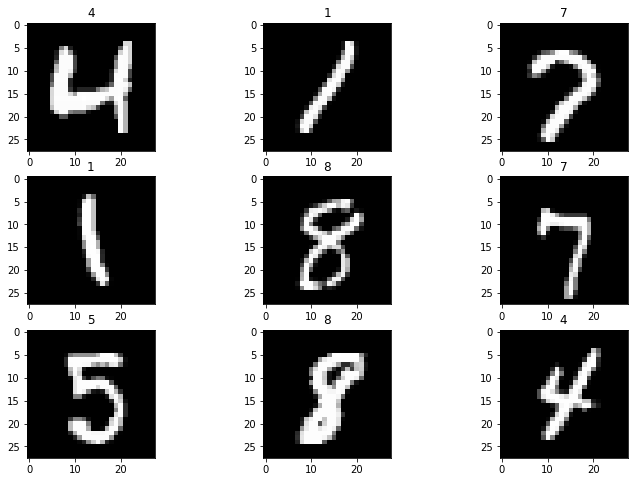

In [3]:
plt.figure(figsize=(12, 8))
np.random.seed(0)
idx = np.random.randint(0, 60000, 9)

for i in range(len(idx)):
    plt.subplot(3, 3, i+1)
    plt.title(y_train[idx[i]])
    grid_data = np.reshape(x_train[idx[i]], (28,28))
    plt.imshow(grid_data, cmap='gray')

# Plotting count plot

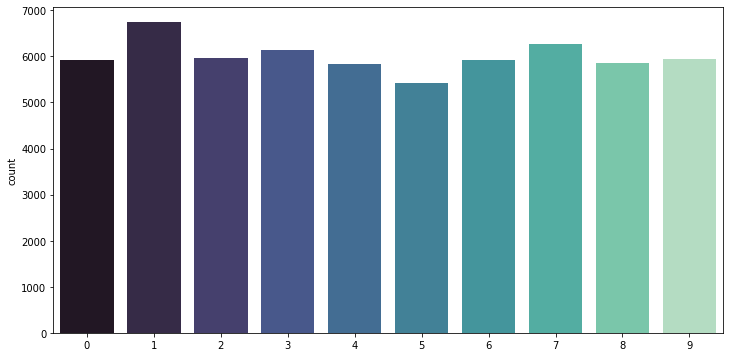

In [4]:
plt.figure(figsize = (12,6))
sns.countplot(y_train,palette="mako")

# Pre-processing the data

In [5]:
# Pre-processing the data
print('Training images shape : ',x_train.shape)
print('Testing images shape : ',x_test.shape)

Training images shape :  (60000, 28, 28)
Testing images shape :  (10000, 28, 28)


In [6]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

In [7]:
# Applying Normalization
x_train=x_train/255.0
x_test=x_test/255.0
num_classes = 10

# Creating the model

Model Architecture

We will have to first build the model architecture and define it based on our dataset. We are going to add the following layers:

Conv2D - for the convolution layers

Dropout - to prevent overfitting

Dense - a fully connected layer

Softmax activation - This is used to convert all predictions into probability The model architecture can be tuned to get optimal performance

so i am going to create a model with

# CNN + Three layers + relu + (3,3) kernel_size + Dropout rate (0.3)

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten,Activation
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.layers import BatchNormalization

In [9]:
model = Sequential()

model.add(Conv2D(128, kernel_size=(3, 3),
                 activation=tf.nn.relu,
                 input_shape=input_shape))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), activation=tf.nn.relu))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(32, (3, 3), activation=tf.nn.relu))
model.add(BatchNormalization())
model.add(Dropout(0.3))


model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation=tf.nn.softmax))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 128)       1280      
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 128)      512       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 26, 26, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        73792     
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24, 64)       256       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 24, 24, 64)        0

# Training the model

In [11]:
# Train the model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
history=model.fit(x=x_train,
                  y=y_train,
                  validation_split=0.1,
                  epochs=10)

Epoch 1/10
1688/1688 [==============================] - 625s 370ms/step - loss: 0.2677 - accuracy: 0.9221 - val_loss: 0.0704 - val_accuracy: 0.9820
Epoch 2/10
1688/1688 [==============================] - 619s 367ms/step - loss: 0.1101 - accuracy: 0.9677 - val_loss: 0.1294 - val_accuracy: 0.9767
Epoch 3/10
1688/1688 [==============================] - 619s 367ms/step - loss: 0.0897 - accuracy: 0.9739 - val_loss: 0.1017 - val_accuracy: 0.9822
Epoch 4/10
1688/1688 [==============================] - 605s 358ms/step - loss: 0.0754 - accuracy: 0.9777 - val_loss: 0.0987 - val_accuracy: 0.9838
Epoch 5/10
1688/1688 [==============================] - 599s 355ms/step - loss: 0.0632 - accuracy: 0.9812 - val_loss: 0.1252 - val_accuracy: 0.9797
Epoch 6/10
1688/1688 [==============================] - 603s 357ms/step - loss: 0.0601 - accuracy: 0.9822 - val_loss: 0.1502 - val_accuracy: 0.9778
Epoch 7/10
1688/1688 [==============================] - 597s 354ms/step - loss: 0.0540 - accuracy: 0.9845 - val_

# Saving and loading the model

In [12]:
model.save('MNproject.h5')

In [13]:
from tensorflow.keras.models import load_model
model = load_model('MNproject.h5')

# Evaluating the model

In [14]:
# Evaluate the model
loss_and_acc=model.evaluate(x_test,y_test)
print("Test Loss", loss_and_acc[0])
print("Test Accuracy", loss_and_acc[1])

313/313 [==============================] - 23s 73ms/step - loss: 0.0873 - accuracy: 0.9840
Test Loss 0.08725825697183609
Test Accuracy 0.984000027179718


# Plotting Training & Validation plots

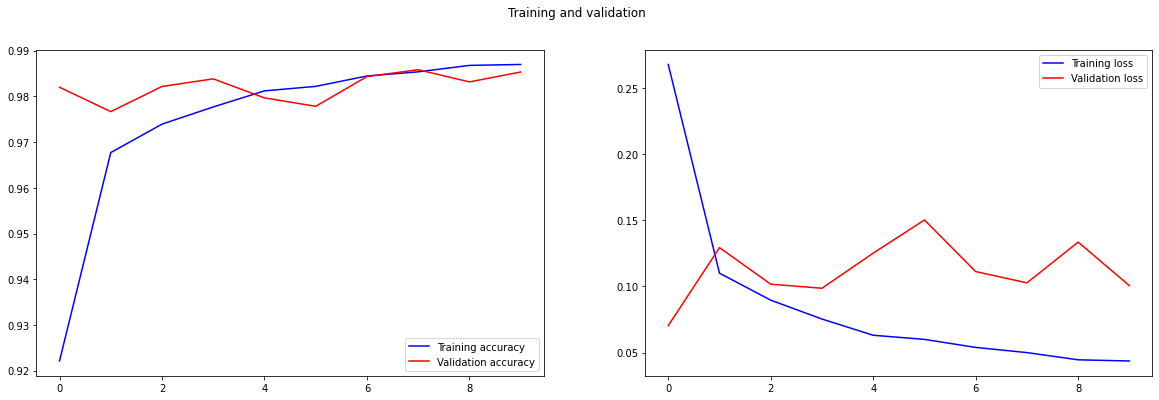

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
ax[0].plot(epochs, acc, 'b', label='Training accuracy')
ax[0].plot(epochs, val_acc, 'r', label='Validation accuracy')
ax[0].legend(loc=0)
ax[1].plot(epochs, loss, 'b', label='Training loss')
ax[1].plot(epochs, val_loss, 'r', label='Validation loss')
ax[1].legend(loc=0)

plt.suptitle('Training and validation')
plt.show()

In [16]:
# Confusion Matrix
y_predicted = model.predict(x_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 976,    0,    0,    0,    0,    0,    3,    1,    0,    0],
       [   0, 1130,    1,    2,    0,    2,    0,    0,    0,    0],
       [   2,   14, 1000,    6,    0,    0,    0,   10,    0,    0],
       [   0,    0,    0, 1007,    0,    1,    0,    2,    0,    0],
       [   1,    4,    1,    0,  953,    0,    5,    3,    1,   14],
       [   1,    0,    0,    8,    0,  881,    1,    1,    0,    0],
       [   5,    3,    0,    0,    1,    4,  945,    0,    0,    0],
       [   0,    4,    0,    1,    0,    0,    0, 1022,    1,    0],
       [   2,    3,    2,    9,    1,    3,    2,    2,  938,   12],
       [   2,    3,    0,    4,    2,    4,    0,    5,    1,  988]],
      dtype=int32)>

# Plotting heat map

Text(105.0, 0.5, 'Truth')

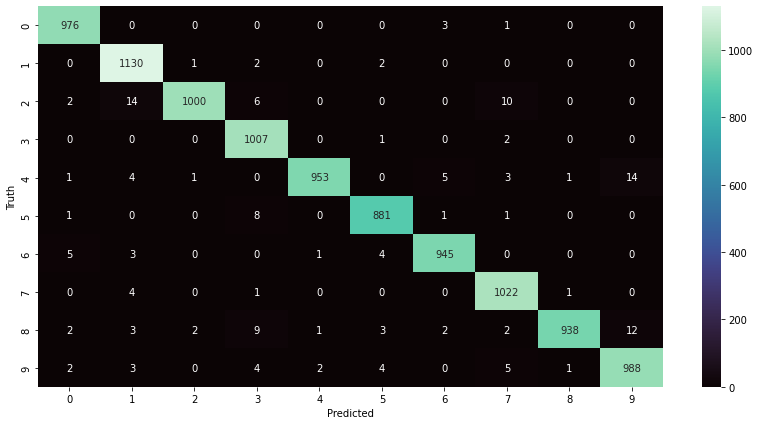

In [17]:
plt.figure(figsize = (14,7))
sns.heatmap(cm, annot=True, fmt='d', cmap = 'mako')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Testing the Model

Predicted Value:  9
Successful prediction


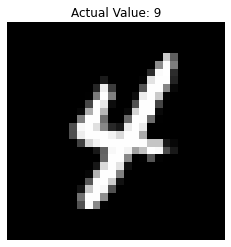

In [31]:
plt.imshow(grid_data, cmap='gray')
plt.title('Actual Value: {}'.format(y_test[7]))
prediction=model.predict(x_test)

plt.axis('off')
print('Predicted Value: ',np.argmax(prediction[7]))
if(y_test[7]==(np.argmax(prediction[7]))):
  print('Successful prediction')
else:
  print('Unsuccessful prediction')

Predicted Value:  2
Successful prediction


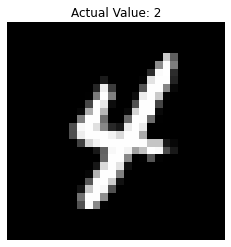

In [34]:
plt.imshow(grid_data, cmap='gray')
plt.title('Actual Value: {}'.format(y_test[1]))
prediction=model.predict(x_test)
plt.axis('off')
print('Predicted Value: ',np.argmax(prediction[1]))
if(y_test[1]==(np.argmax(prediction[1]))):
  print('Successful prediction')
else:
  print('Unsuccessful prediction')